##### Olympics 2024 - Analytics & Predictions

Data Overview

In [80]:
import pandas as pd

# Load the datasets
results = pd.read_csv('/Users/kumarrishabh/Downloads/archive_2/olympic_results_clean.csv')
athletes = pd.read_csv('/Users/kumarrishabh/Downloads/archive_2/olympic_athletes_backup.csv')
hosts = pd.read_csv('/Users/kumarrishabh/Downloads/archive_2/olympic_hosts.csv')
medals = pd.read_csv('/Users/kumarrishabh/Downloads/archive_2/olympic_medals.csv')

# Merge results with medals using common fields like athlete_url, slug_game, and country_name
merged_data = pd.merge(results, medals, on=['slug_game', 'athlete_url', 'country_name'], how='left')

# Merge with athlete details
merged_data = pd.merge(merged_data, athletes, on='athlete_url', how='left')

# Merge with hosts data using slug_game
merged_data = pd.merge(merged_data, hosts, left_on='slug_game', right_on='game_slug', how='left')

# Check the structure of the merged data
print(merged_data.head())


  discipline_title_x event_title_x     slug_game participant_type_x  \
0   Freestyle Skiing  Men's Moguls  beijing-2022            Athlete   
1   Freestyle Skiing  Men's Moguls  beijing-2022            Athlete   
2   Freestyle Skiing  Men's Moguls  beijing-2022            Athlete   
3   Freestyle Skiing  Men's Moguls  beijing-2022            Athlete   
4   Freestyle Skiing  Men's Moguls  beijing-2022            Athlete   

  medal_type_x  rank_position              country_name country_code_x  \
0          NaN              6                 Australia             AU   
1          NaN             17                    Sweden             SE   
2          NaN             16  United States of America             US   
3          NaN             19                   Finland             FI   
4          NaN              8                Kazakhstan             KZ   

  country_3_letter_code_x                                        athlete_url  \
0                     AUS  https://olympics.com/

In [100]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117527 entries, 0 to 117526
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   discipline_title_x       117527 non-null  object 
 1   event_title_x            117527 non-null  object 
 2   slug_game                117527 non-null  object 
 3   participant_type_x       117527 non-null  object 
 4   medal_type_x             17026 non-null   object 
 5   rank_position            117527 non-null  int64  
 6   country_name             117527 non-null  object 
 7   country_code_x           117459 non-null  object 
 8   country_3_letter_code_x  117527 non-null  object 
 9   athlete_url              117527 non-null  object 
 10  athlete_full_name_x      117527 non-null  object 
 11  discipline_title_y       21129 non-null   object 
 12  event_title_y            21129 non-null   object 
 13  event_gender             21129 non-null   object 
 14  meda

In [88]:
merged_data.head(5)

,discipline_title_x,event_title_x,slug_game,participant_type_x,medal_type_x,rank_position,country_name,country_code_x,country_3_letter_code_x,athlete_url,...,first_game,athlete_year_birth,athlete_medals,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,6,Australia,AU,AUS,https://olympics.com/en/athletes/cooper-woods-...,...,Beijing 2022,2000.0,0G|0S|0B,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,17,Sweden,SE,SWE,https://olympics.com/en/athletes/elofsson,...,PyeongChang 2018,1995.0,0G|0S|0B,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,16,United States of America,US,USA,https://olympics.com/en/athletes/dylan-walczyk,...,Beijing 2022,1993.0,0G|0S|0B,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
3,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,19,Finland,FI,FIN,https://olympics.com/en/athletes/olli-penttala,...,Beijing 2022,1995.0,0G|0S|0B,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,8,Kazakhstan,KZ,KAZ,https://olympics.com/en/athletes/reikherd,...,Beijing 2022,1989.0,0G|0S|0B,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


In [103]:
merged_data.isnull().sum()

discipline_title_x              0
event_title_x                   0
slug_game                       0
participant_type_x              0
medal_type_x               100501
rank_position                   0
country_name                    0
country_code_x                 68
country_3_letter_code_x         0
athlete_url                     0
athlete_full_name_x             0
discipline_title_y          96398
event_title_y               96398
event_gender                96398
medal_type_y                96398
participant_type_y          96398
athlete_full_name_y         96398
country_code_y              96407
country_3_letter_code_y     96398
athlete_full_name            2435
games_participations         2435
first_game                   2435
athlete_year_birth           2435
athlete_medals                  0
game_slug                       0
game_end_date                   0
game_start_date                 0
game_location                   0
game_name                       0
game_season   

Removing duplicate columns after merge

In [85]:
columns_to_remove = ['participant_type_x','discipline_title_y','event_title_y','event_gender','medal_type_y','participant_type_y','athlete_full_name_y','country_code_y','country_3_letter_code_y',
    'athlete_full_name','game_slug','country_code_x','country_3_letter_code_x','game_end_date','game_start_date']

# Drop the columns
merged_data_cleaned = merged_data.drop(columns=columns_to_remove)

In [108]:
merged_data_cleaned.head(100)

,discipline_title_x,event_title_x,slug_game,medal_type_x,rank_position,country_name,athlete_url,athlete_full_name_x,games_participations,first_game,athlete_year_birth,athlete_medals,game_location,game_name,game_season,game_year
0,Freestyle Skiing,Men's Moguls,beijing-2022,NaN,6,Australia,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1.0,Beijing 2022,2000.0,0G|0S|0B,China,Beijing 2022,Winter,2022
1,Freestyle Skiing,Men's Moguls,beijing-2022,NaN,17,Sweden,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2.0,PyeongChang 2018,1995.0,0G|0S|0B,China,Beijing 2022,Winter,2022
2,Freestyle Skiing,Men's Moguls,beijing-2022,NaN,16,United States of America,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1.0,Beijing 2022,1993.0,0G|0S|0B,China,Beijing 2022,Winter,2022
3,Freestyle Skiing,Men's Moguls,beijing-2022,NaN,19,Finland,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1.0,Beijing 2022,1995.0,0G|0S|0B,China,Beijing 2022,Winter,2022
4,Freestyle Skiing,Men's Moguls,beijing-2022,NaN,8,Kazakhstan,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1.0,Beijing 2022,1989.0,0G|0S|0B,China,Beijing 2022,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Freestyle Skiing,Men's Ski Cross,beijing-2022,NaN,26,Japan,https://olympics.com/en/athletes/satoshi-furuno,Satoshi FURUNO,1.0,Beijing 2022,1999.0,0G|0S|0B,China,Beijing 2022,Winter,2022
96,Freestyle Skiing,Men's Ski Cross,beijing-2022,NaN,20,France,https://olympics.com/en/athletes/jean-frederic...,Jean Frederic CHAPUIS,3.0,Sochi 2014,1989.0,1G|0S|0B,China,Beijing 2022,Winter,2022
97,Freestyle Skiing,Men's Ski Cross,beijing-2022,NaN,10,Canada,https://olympics.com/en/athletes/jared-schmidt,Jared SCHMIDT,1.0,Beijing 2022,1997.0,0G|0S|0B,China,Beijing 2022,Winter,2022
98,Freestyle Skiing,Men's Ski Cross,beijing-2022,NaN,8,France,https://olympics.com/en/athletes/francois-place,Francois PLACE,2.0,PyeongChang 2018,1989.0,0G|0S|0B,China,Beijing 2022,Winter,2022


In [104]:
# Fill missing values in 'athlete_medals' with '0G|0S|0B'
merged_data_cleaned['athlete_medals'] = merged_data_cleaned['athlete_medals'].fillna('0G|0S|0B')

In [105]:
merged_data_cleaned.isnull().sum()

discipline_title_x           0
event_title_x                0
slug_game                    0
medal_type_x            100501
rank_position                0
country_name                 0
athlete_url                  0
athlete_full_name_x          0
games_participations      2435
first_game                2435
athlete_year_birth        2435
athlete_medals               0
game_location                0
game_name                    0
game_season                  0
game_year                    0
dtype: int64

##### Distribution Analysis

Distribution of Medal types

/var/folders/48/x0gc8y212k7gm2td2_tzpjs00000gn/T/ipykernel_51667/4222677365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=merged_data, x='medal_type_x', palette='viridis')


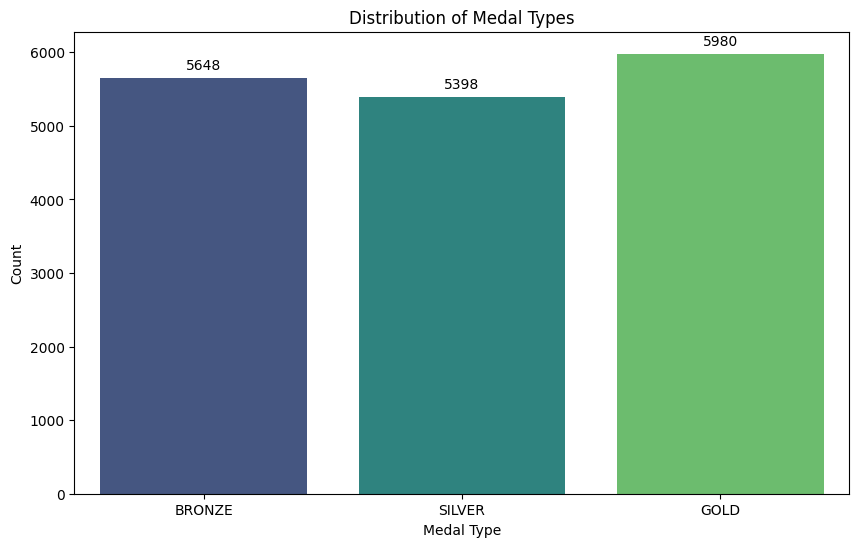

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of medals
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_data, x='medal_type_x', palette='viridis')

# Add title and labels
plt.title('Distribution of Medal Types')
plt.xlabel('Medal Type')
plt.ylabel('Count')

# Annotate bars with the count of medals
for p in ax.patches:
    # Get the height of each bar (count of medals)
    height = p.get_height()
    # Add the count above each bar
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Show plot
plt.show()


Top 15 Countries by Medal Count

/var/folders/48/x0gc8y212k7gm2td2_tzpjs00000gn/T/ipykernel_51667/4084250896.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_medal_counts_df, x='country_name', y='total_medals', palette='viridis')


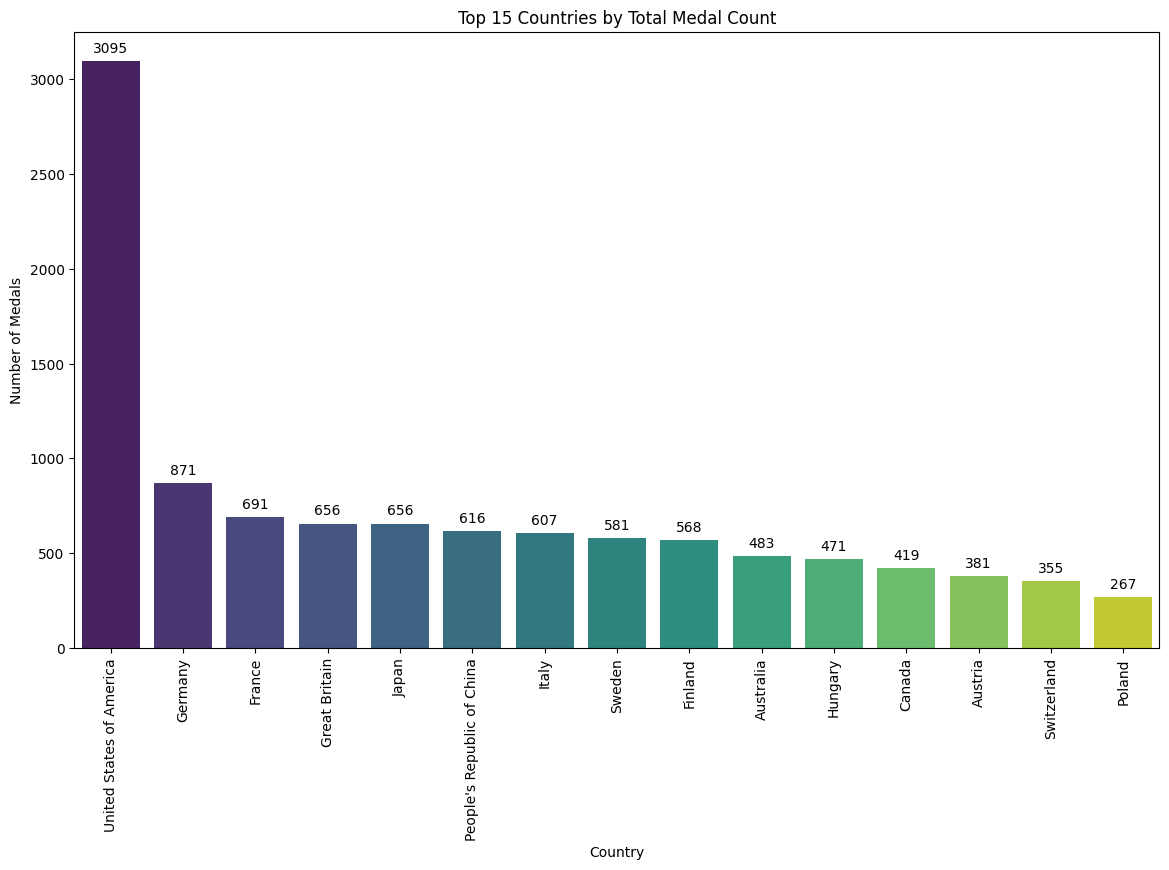

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get total medals for each country from top athletes
country_medal_counts = top_countries_sorted_df.groupby('country_name')['medal_type_x'].count().sort_values(ascending=False).head(15)

# Prepare data for plotting
country_medal_counts_df = pd.DataFrame({
    'country_name': country_medal_counts.index,
    'total_medals': country_medal_counts.values
})

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=country_medal_counts_df, x='country_name', y='total_medals', palette='viridis')
plt.title('Top 15 Countries by Total Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)

# Annotate bars with the number of medals
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


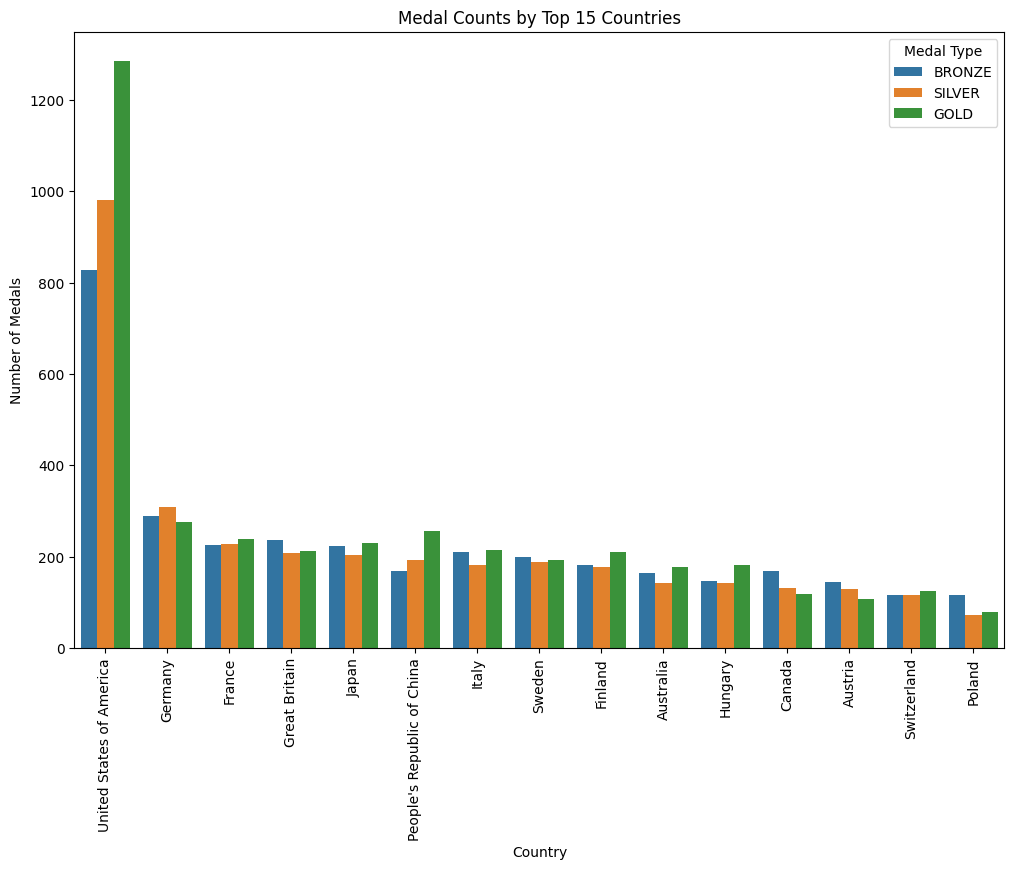

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total medals per country
medal_counts = top_countries_df.groupby('country_name')['medal_type_x'].count().sort_values(ascending=False)
top_countries_sorted = medal_counts.head(15).index

# Filter for top 15 countries
top_countries_sorted_df = top_countries_df[top_countries_df['country_name'].isin(top_countries_sorted)]

# Plot medal counts by top 15 countries with sorted bars
plt.figure(figsize=(12, 8))
sns.countplot(data=top_countries_sorted_df, x='country_name', hue='medal_type_x', order=top_countries_sorted)
plt.title('Medal Counts by Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.legend(title='Medal Type')
plt.show()


Medal Distribution in Summer and Winter Olympics

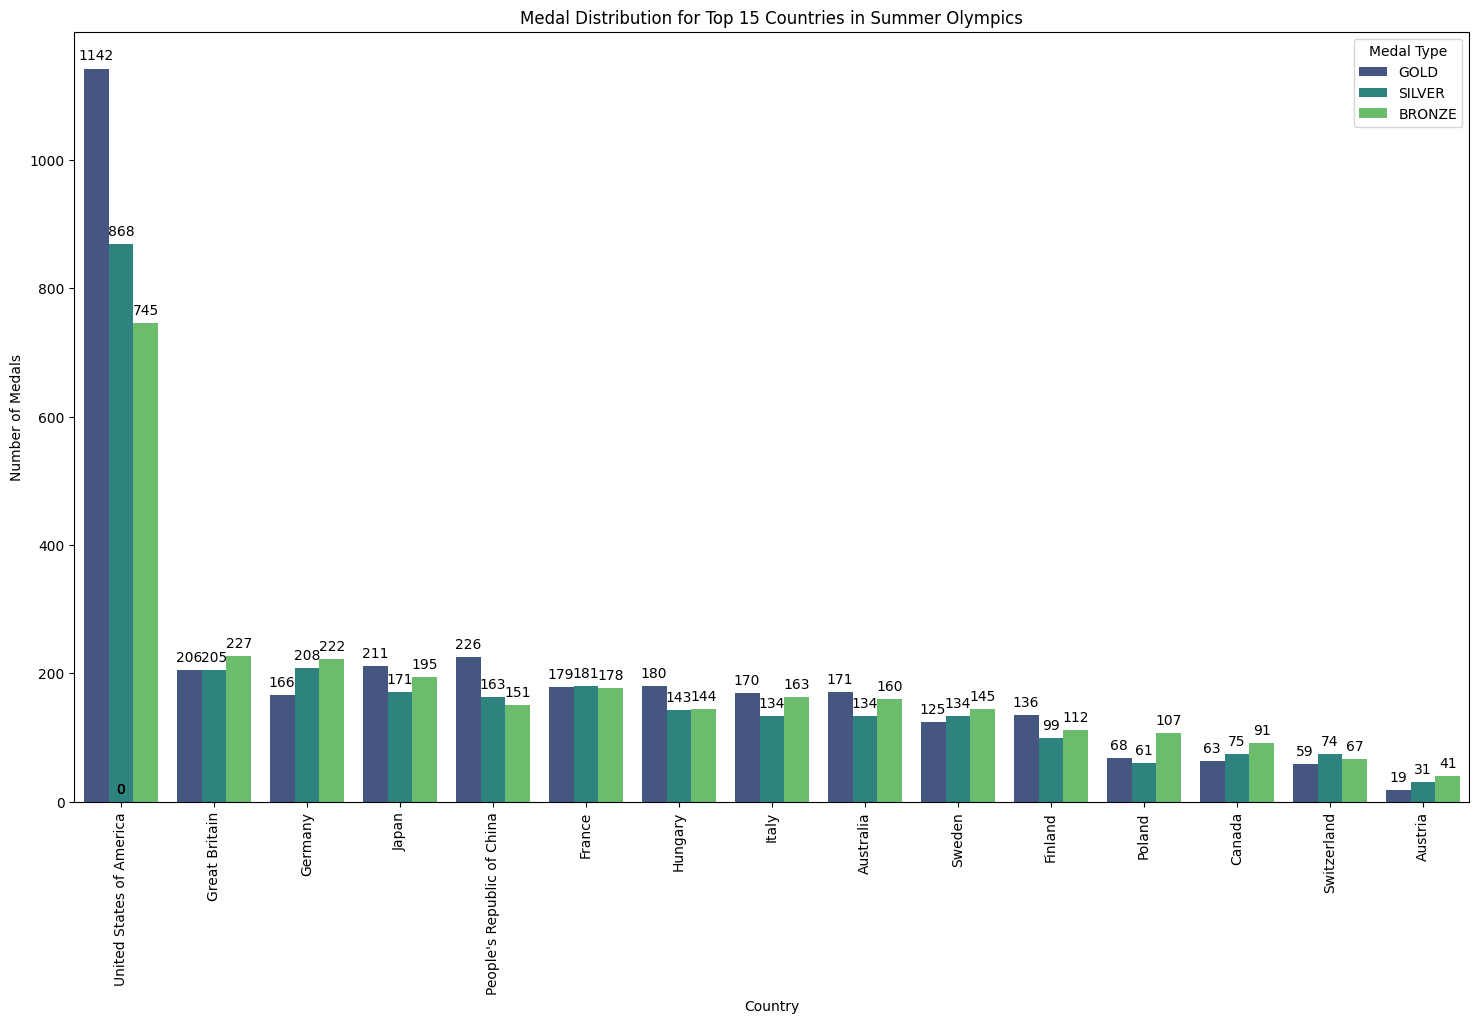

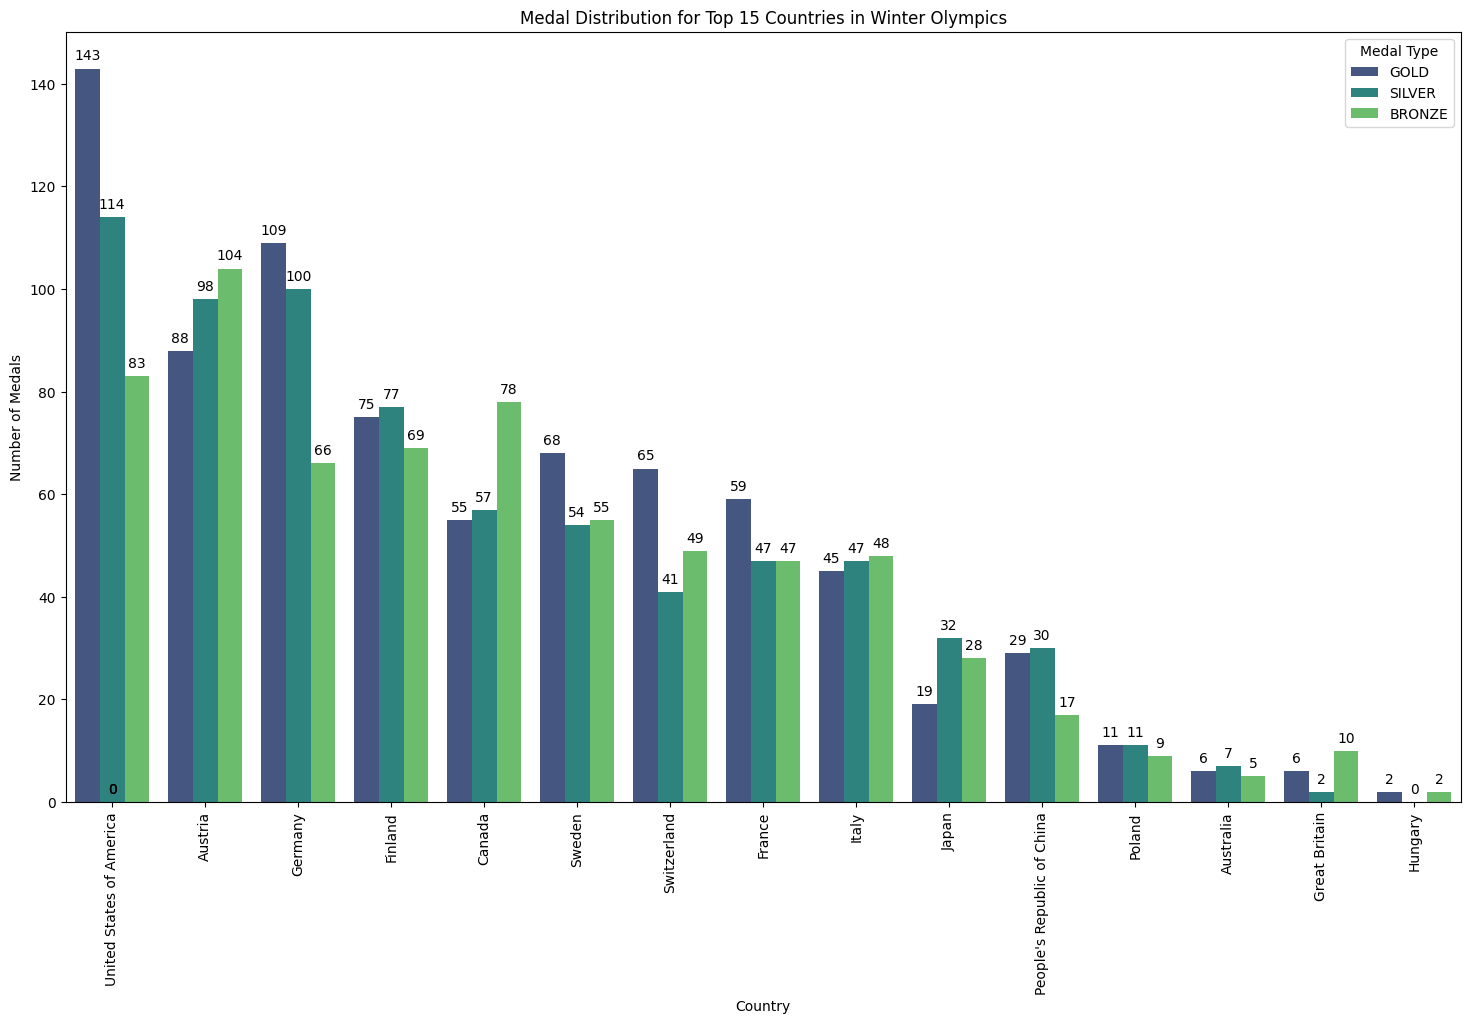

In [32]:
# Filter data for Summer and Winter Olympics
summer_data = top_countries_sorted_df[top_countries_sorted_df['game_season'] == 'Summer']
winter_data = top_countries_sorted_df[top_countries_sorted_df['game_season'] == 'Winter']

# Aggregate medal counts by country and medal type for Summer Olympics
summer_medal_counts = summer_data.groupby('country_name')['medal_type_x'].value_counts().unstack().fillna(0)
summer_total_medals = summer_medal_counts.sum(axis=1).sort_values(ascending=False).head(15)
summer_medal_counts = summer_medal_counts.loc[summer_total_medals.index]

# Aggregate medal counts by country and medal type for Winter Olympics
winter_medal_counts = winter_data.groupby('country_name')['medal_type_x'].value_counts().unstack().fillna(0)
winter_total_medals = winter_medal_counts.sum(axis=1).sort_values(ascending=False).head(15)
winter_medal_counts = winter_medal_counts.loc[winter_total_medals.index]


# Prepare data for plotting
summer_medal_counts_df = summer_medal_counts.reset_index().melt(id_vars='country_name', value_vars=['GOLD', 'SILVER', 'BRONZE'], var_name='medal_type', value_name='count')
winter_medal_counts_df = winter_medal_counts.reset_index().melt(id_vars='country_name', value_vars=['GOLD', 'SILVER', 'BRONZE'], var_name='medal_type', value_name='count')


# Plot Summer Olympics medal distribution
plt.figure(figsize=(18, 10))
sns.barplot(data=summer_medal_counts_df, x='country_name', y='count', hue='medal_type', palette='viridis', order=summer_total_medals.index)
plt.title('Medal Distribution for Top 15 Countries in Summer Olympics')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.legend(title='Medal Type')

# Annotate bars with the number of medals
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

# Plot Winter Olympics medal distribution
plt.figure(figsize=(18, 10))
sns.barplot(data=winter_medal_counts_df, x='country_name', y='count', hue='medal_type', palette='viridis', order=winter_total_medals.index)
plt.title('Medal Distribution for Top 15 Countries in Winter Olympics')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.legend(title='Medal Type')

# Annotate bars with the number of medals
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


Countries which hosted both Summer and Winter Olympics

/var/folders/48/x0gc8y212k7gm2td2_tzpjs00000gn/T/ipykernel_52054/1681230453.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=hosting_counts_sorted_df, x='game_location', y='Total', palette='viridis')


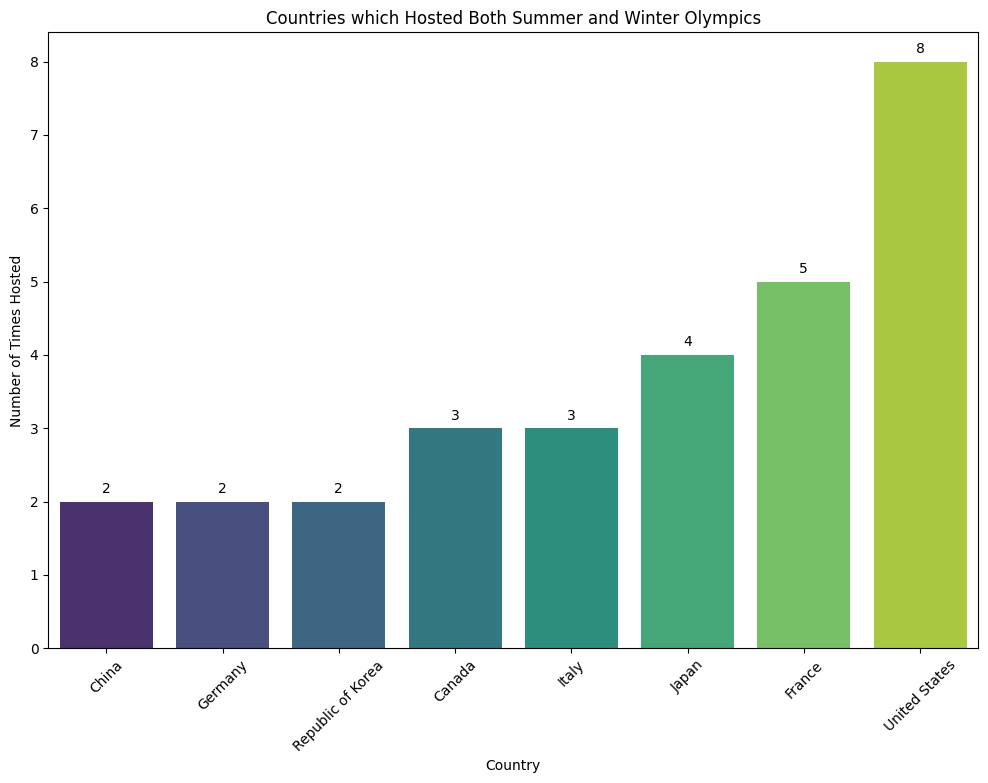

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the CSV file into a DataFrame
file_path = '/Users/kumarrishabh/Downloads/archive_2/olympic_hosts.csv'  # Update this with the correct path
olympics_hosts_df = pd.read_csv(file_path)

# Count number of times each country has hosted Summer and Winter Olympics
hosting_counts = olympics_hosts_df.groupby(['game_location', 'game_season']).size().unstack().fillna(0)

# Filter for countries that have hosted both Summer and Winter Olympics
hosting_counts = hosting_counts[hosting_counts['Summer'] > 0]
hosting_counts = hosting_counts[hosting_counts['Winter'] > 0]

# Calculate the total number of times each country has hosted the Olympics
hosting_counts['Total'] = hosting_counts['Summer'] + hosting_counts['Winter']

# Sort by total number of hosts
hosting_counts_sorted = hosting_counts.sort_values(by='Total', ascending=True)

# Prepare data for plotting
hosting_counts_sorted_df = hosting_counts_sorted.reset_index()

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=hosting_counts_sorted_df, x='game_location', y='Total', palette='viridis')

# Add title and labels
plt.title('Countries which Hosted Both Summer and Winter Olympics')
plt.xlabel('Country')
plt.ylabel('Number of Times Hosted')

# Annotate bars with the number of times hosted
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


<Figure size 1400x1000 with 0 Axes>

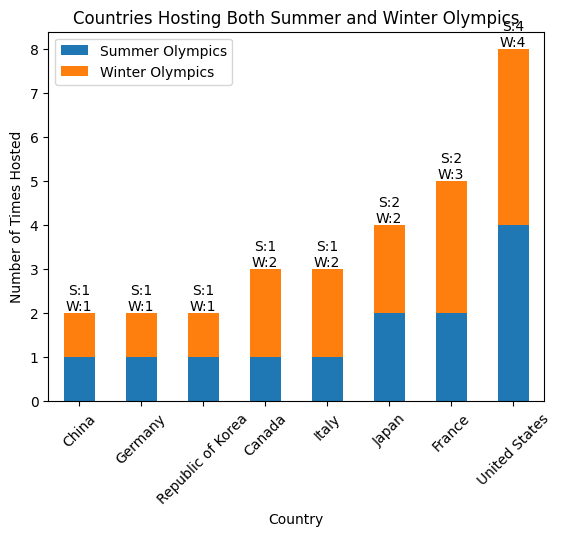

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Load the CSV file into a DataFrame
file_path = '/Users/kumarrishabh/Downloads/archive_2/olympic_hosts.csv'  # Update this with the correct path
olympics_hosts_df = pd.read_csv(file_path)

# Count the number of times each country has hosted Summer and Winter Olympics
summer_hosts = olympics_hosts_df[olympics_hosts_df['game_season'] == 'Summer']
winter_hosts = olympics_hosts_df[olympics_hosts_df['game_season'] == 'Winter']

# Count the number of times each country has hosted Summer and Winter Olympics
summer_host_counts = summer_hosts['game_location'].value_counts()
winter_host_counts = winter_hosts['game_location'].value_counts()

# Merge counts to find countries that have hosted both
host_counts = pd.DataFrame({
    'summer_host_count': summer_host_counts,
    'winter_host_count': winter_host_counts
}).fillna(0)

# Filter countries that have hosted both Summer and Winter Olympics
both_hosts = host_counts[(host_counts['summer_host_count'] > 0) & (host_counts['winter_host_count'] > 0)]

# Sort by the total number of times hosted
both_hosts = both_hosts.sort_values(by=['summer_host_count', 'winter_host_count'], ascending=True)

# Plotting
plt.figure(figsize=(14, 10))
both_hosts[['summer_host_count', 'winter_host_count']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Countries Hosting Both Summer and Winter Olympics')
plt.xlabel('Country')
plt.ylabel('Number of Times Hosted')
plt.xticks(rotation=45)

# Annotate bars with the number of times hosted
for i, (summer, winter) in enumerate(zip(both_hosts['summer_host_count'], both_hosts['winter_host_count'])):
    plt.text(i, summer + winter, f'S:{int(summer)}\nW:{int(winter)}', ha='center', va='bottom')

plt.legend(['Summer Olympics', 'Winter Olympics'])
plt.show()

Top 15 Athletes by Medal Count

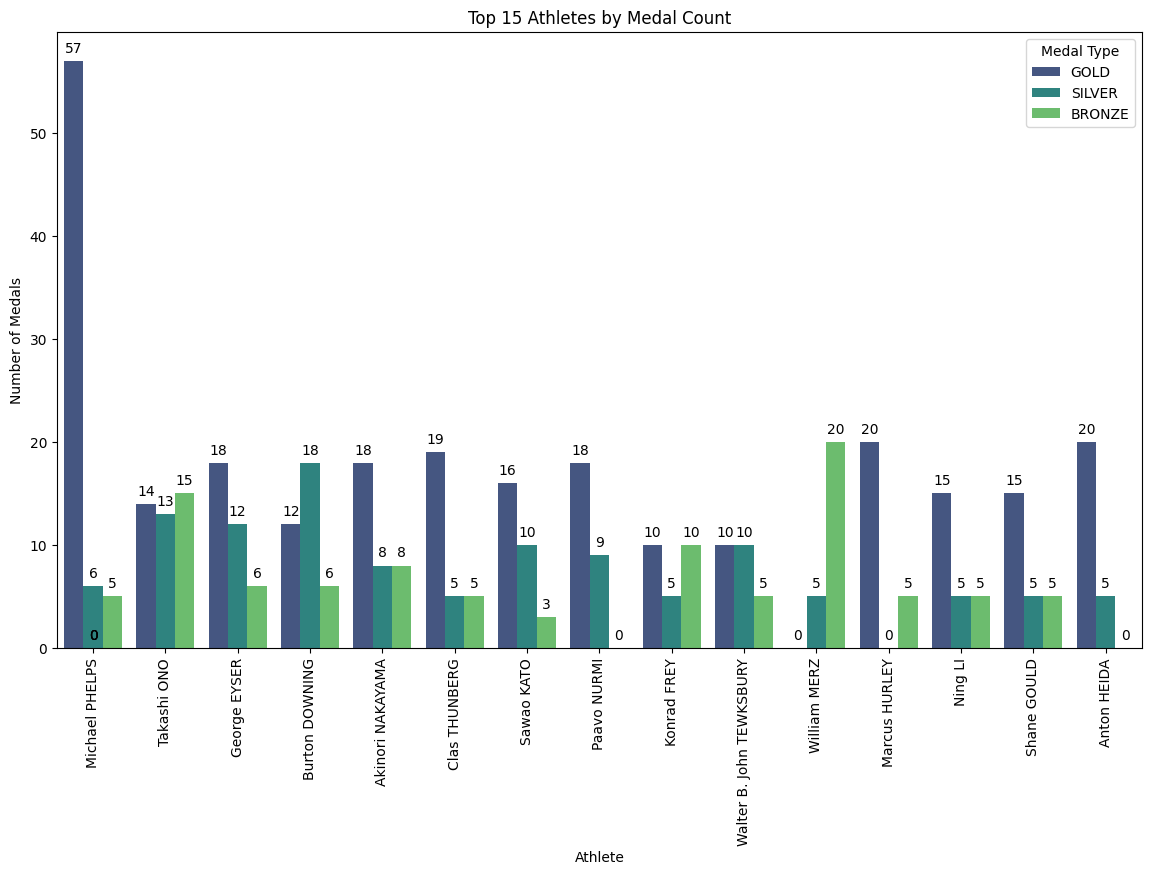

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_countries_athletes_df = merged_data_cleaned[merged_data_cleaned['country_name'].isin(top_countries.index)]

athlete_medal_counts = top_countries_athletes_df.groupby('athlete_full_name_x')['medal_type_x'].value_counts().unstack().fillna(0)

# Sum up the medals for each athlete
athlete_total_medals = athlete_medal_counts.sum(axis=1).sort_values(ascending=False).head(15)
top_athletes_df = athlete_medal_counts.loc[athlete_total_medals.index]

# Prepare data for plotting
top_athletes_df = top_athletes_df.reset_index().melt(id_vars='athlete_full_name_x', value_vars=['GOLD', 'SILVER', 'BRONZE'], var_name='medal_type', value_name='count')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=top_athletes_df, x='athlete_full_name_x', y='count', hue='medal_type', palette='viridis')
plt.title('Top 15 Athletes by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)

# Annotate bars with the number of medals
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.legend(title='Medal Type')
plt.show()


Correlation Matrix

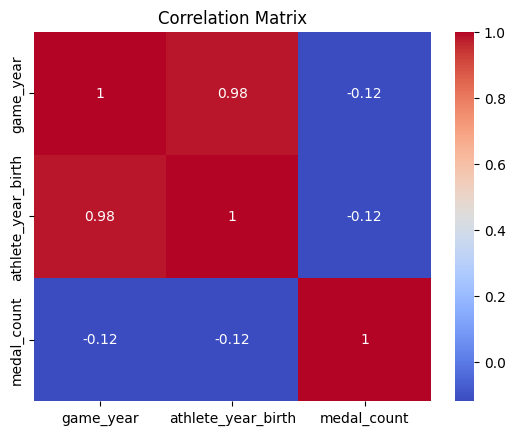

In [21]:
# Assuming numerical conversion for correlation
numerical_features = top_countries_df[['game_year', 'athlete_year_birth']].copy()
numerical_features['medal_count'] = top_countries_df['medal_type_x'].apply(lambda x: 1 if x in ['GOLD', 'SILVER', 'BRONZE'] else 0)
correlation_matrix = numerical_features.corr()

# Plot heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/var/folders/48/x0gc8y212k7gm2td2_tzpjs00000gn/T/ipykernel_52054/1439376672.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=summer_sports_medals, x='discipline_title_x', y='medal_type_x', palette='coolwarm')


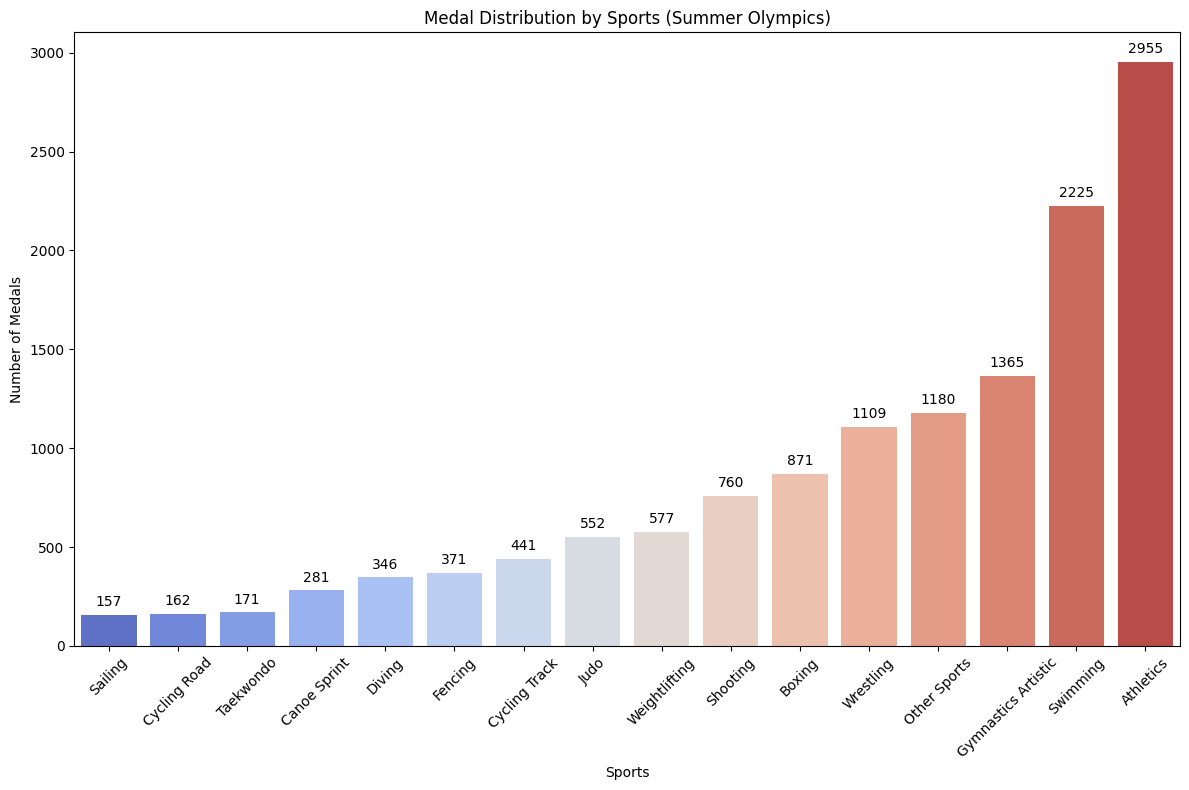

/var/folders/48/x0gc8y212k7gm2td2_tzpjs00000gn/T/ipykernel_52054/1439376672.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=winter_sports_medals, x='discipline_title_x', y='medal_type_x', palette='coolwarm')


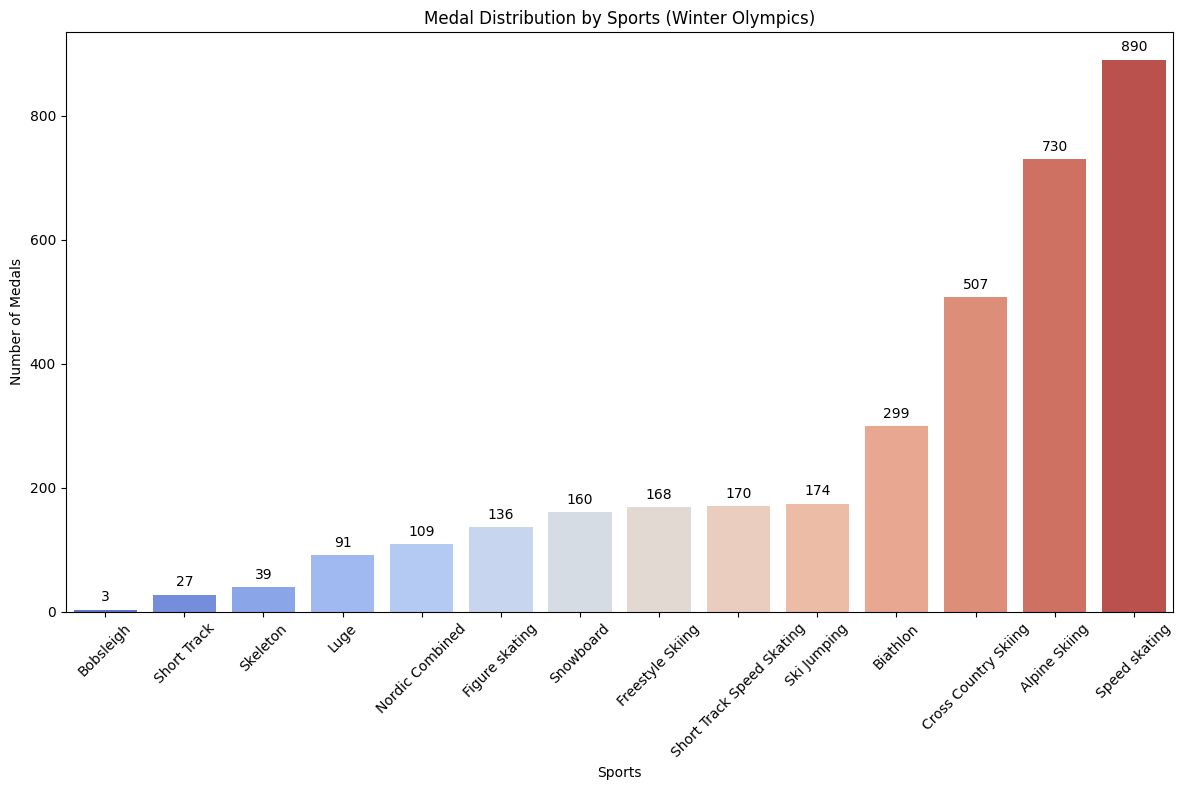

In [138]:
# Filter Summer and Winter Olympics data
summer_olympics = merged_data[merged_data['game_season'] == 'Summer']
winter_olympics = merged_data[merged_data['game_season'] == 'Winter']

# Function to group sports and combine into "Other Sports" if the count exceeds 15
def group_sports_by_medals(data, season):
    # Group by discipline and count medals
    sport_medals = data.groupby('discipline_title_x')['medal_type_x'].count().reset_index()
    
    # Sort by medal count in ascending order
    sport_medals = sport_medals.sort_values(by='medal_type_x', ascending=True)

    # If there are more than 15 sports, combine into "Other Sports"
    if len(sport_medals) > 15:
        top_15_sports = sport_medals.tail(15)  # Keep the top 15
        other_sports_count = sport_medals.head(len(sport_medals) - 15)['medal_type_x'].sum()
        other_row = pd.DataFrame({'discipline_title_x': ['Other Sports'], 'medal_type_x': [other_sports_count]})
        sport_medals = pd.concat([top_15_sports, other_row])
    
    return sport_medals.sort_values(by='medal_type_x', ascending=True)  # Sort the final result again

# Get the grouped sports data for both Summer and Winter
summer_sports_medals = group_sports_by_medals(summer_olympics, 'Summer')
winter_sports_medals = group_sports_by_medals(winter_olympics, 'Winter')

# Plot the Summer Olympics sports medal distribution
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=summer_sports_medals, x='discipline_title_x', y='medal_type_x', palette='coolwarm')

# Add title and labels
plt.title('Medal Distribution by Sports (Summer Olympics)')
plt.xlabel('Sports')
plt.ylabel('Number of Medals')

# Annotate bars with the medal count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the Winter Olympics sports medal distribution
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=winter_sports_medals, x='discipline_title_x', y='medal_type_x', palette='coolwarm')

# Add title and labels
plt.title('Medal Distribution by Sports (Winter Olympics)')
plt.xlabel('Sports')
plt.ylabel('Number of Medals')

# Annotate bars with the medal count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [137]:
# Function to group sports and combine into "Other Sports" if the count exceeds 15
def group_sports_by_medals(data):
    # Group by discipline and count medals
    sport_medals = data.groupby('discipline_title_x')['medal_type_x'].count().reset_index()
    
    # Sort by medal count in ascending order
    sport_medals = sport_medals.sort_values(by='medal_type_x', ascending=True)

    # If there are more than 15 sports, combine into "Other Sports"
    if len(sport_medals) > 15:
        top_15_sports = sport_medals.tail(15)  # Keep the top 15
        other_sports_count = sport_medals.head(len(sport_medals) - 15)['medal_type_x'].sum()
        other_row = pd.DataFrame({'discipline_title_x': ['Other Sports'], 'medal_type_x': [other_sports_count]})
        sport_medals = pd.concat([top_15_sports, other_row])
    
    return sport_medals.sort_values(by='medal_type_x', ascending=True)  # Sort the final result again

# Filter Summer and Winter Olympics data
summer_olympics = merged_data[merged_data['game_season'] == 'Summer']
winter_olympics = merged_data[merged_data['game_season'] == 'Winter']

# Get the grouped sports data for both Summer and Winter
summer_sports_medals = group_sports_by_medals(summer_olympics)
winter_sports_medals = group_sports_by_medals(winter_olympics)

# Print the medal distribution for Summer Olympics
print("Medal Distribution by Sports (Summer Olympics):")
print(summer_sports_medals.to_string(index=False))

# Print the medal distribution for Winter Olympics
print("\nMedal Distribution by Sports (Winter Olympics):")
print(winter_sports_medals.to_string(index=False))


Medal Distribution by Sports (Summer Olympics):
 discipline_title_x  medal_type_x
            Sailing           157
       Cycling Road           162
          Taekwondo           171
       Canoe Sprint           281
             Diving           346
            Fencing           371
      Cycling Track           441
               Judo           552
      Weightlifting           577
           Shooting           760
             Boxing           871
          Wrestling          1109
       Other Sports          1180
Gymnastics Artistic          1365
           Swimming          2225
          Athletics          2955

Medal Distribution by Sports (Winter Olympics):
       discipline_title_x  medal_type_x
                Bobsleigh             3
              Short Track            27
                 Skeleton            39
                     Luge            91
          Nordic Combined           109
           Figure skating           136
                Snowboard           160
     

/var/folders/48/x0gc8y212k7gm2td2_tzpjs00000gn/T/ipykernel_52054/839663399.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/48/x0gc8y212k7gm2td2_tzpjs00000gn/T/ipykernel_52054/839663399.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


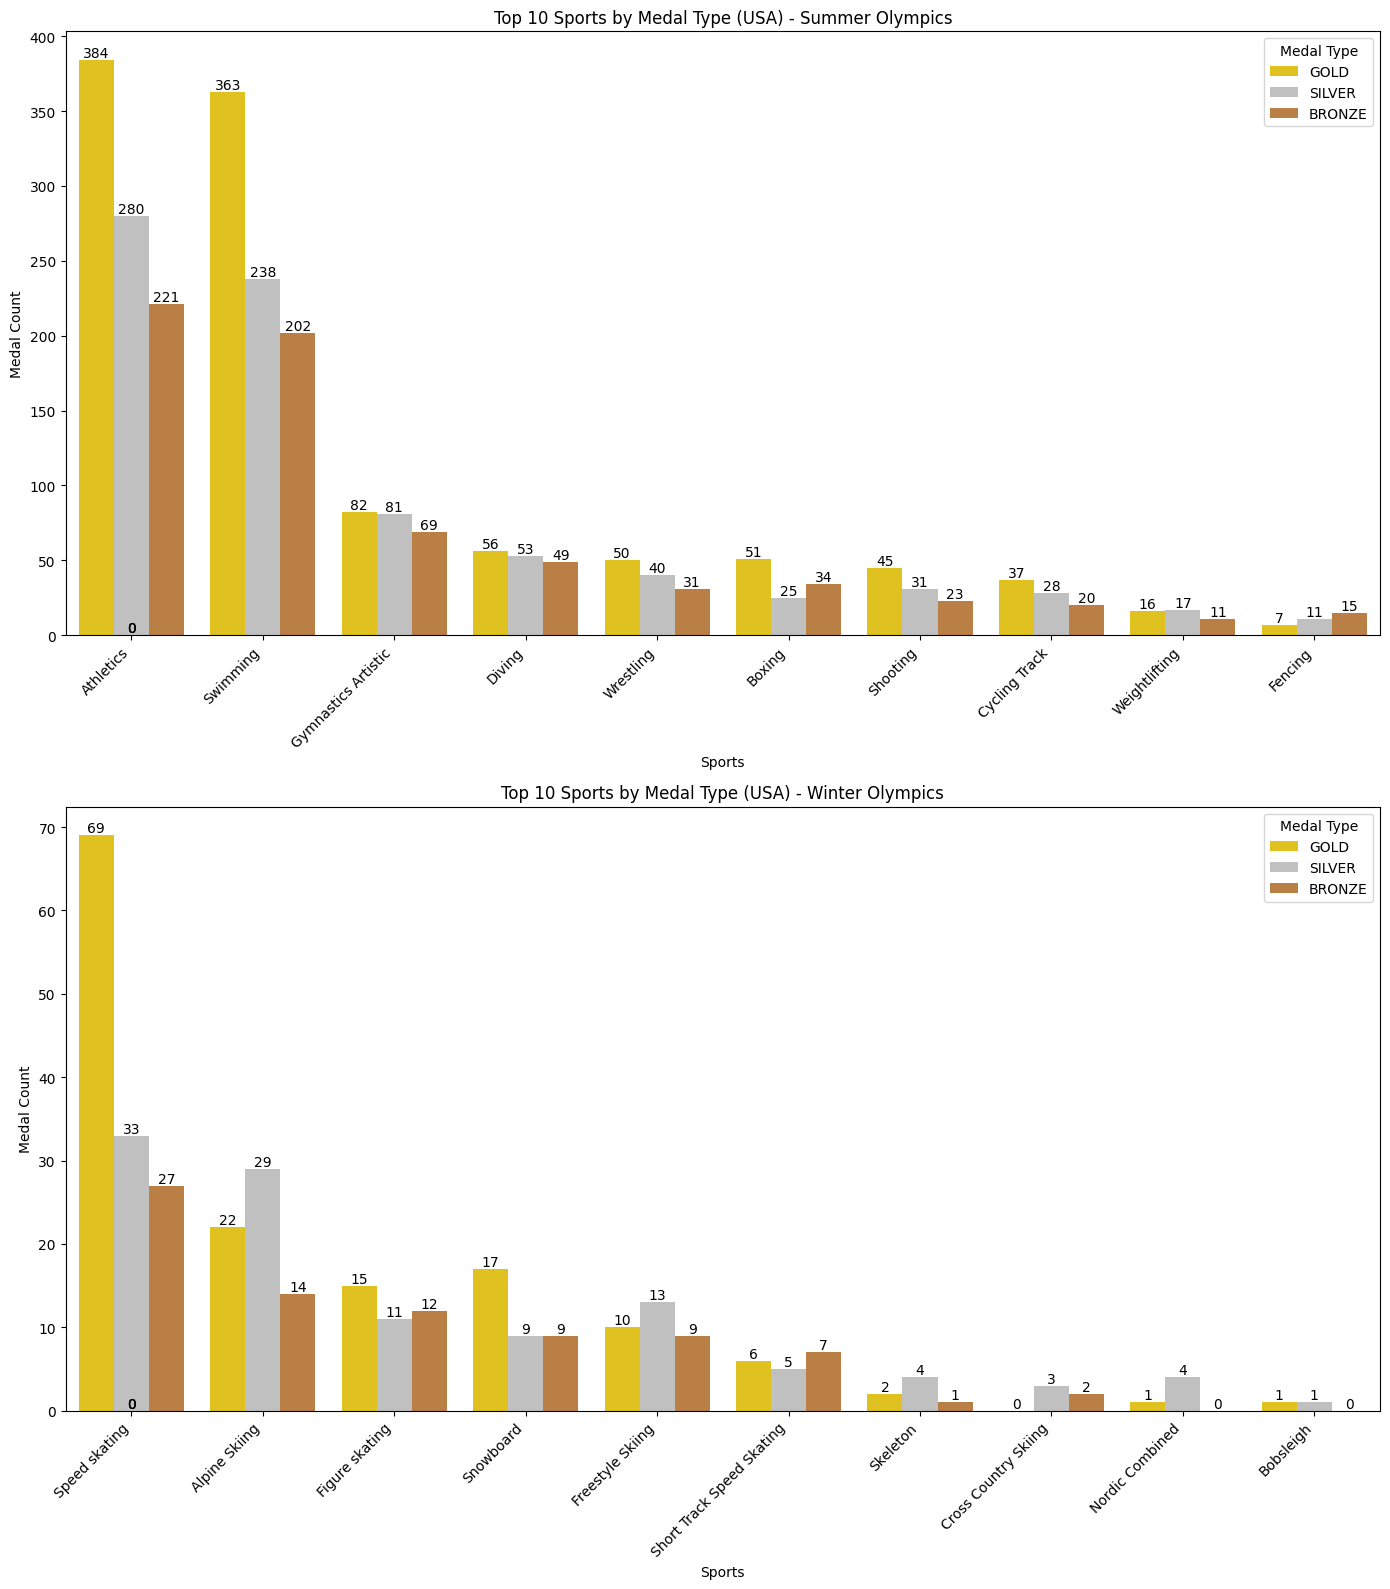

In [136]:
# Filter data for USA
usa_data = merged_data[merged_data['country_name'] == 'United States of America']

# Separate Summer and Winter Olympics data
summer_data = usa_data[usa_data['game_season'] == 'Summer']
winter_data = usa_data[usa_data['game_season'] == 'Winter']

def plot_medal_tally(df, title, ax):
    # Group by sport and medal type, and count medals
    medal_count = df.groupby(['discipline_title_x', 'medal_type_x'])['medal_type_x'].count().unstack().fillna(0)
    
    # Sort by total medals in descending order and select the top 10 sports
    medal_count['total_medals'] = medal_count.sum(axis=1)
    top_10_sports = medal_count.sort_values(by='total_medals', ascending=False).head(10)
    
    # Ensure the medal order is gold, silver, bronze
    top_10_sports = top_10_sports[['GOLD', 'SILVER', 'BRONZE']]
    
    # Melt the DataFrame for plotting
    top_10_sports_melted = top_10_sports.reset_index().melt(id_vars='discipline_title_x', var_name='medal_type_x', value_name='count')
    
    # Plotting
    sns.barplot(data=top_10_sports_melted, x='discipline_title_x', y='count', hue='medal_type_x', ax=ax, palette={'GOLD': '#FFD700', 'SILVER': '#C0C0C0', 'BRONZE': '#CD7F32'})
    
    # Add titles and labels
    ax.set_title(title)
    ax.set_xlabel('Sports')
    ax.set_ylabel('Medal Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='Medal Type')

    # Display numbers on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot graphs
fig, axs = plt.subplots(2, 1, figsize=(14, 16))

plot_medal_tally(summer_data, 'Top 10 Sports by Medal Type (USA) - Summer Olympics', axs[0])
plot_medal_tally(winter_data, 'Top 10 Sports by Medal Type (USA) - Winter Olympics', axs[1])

plt.tight_layout()
plt.show()

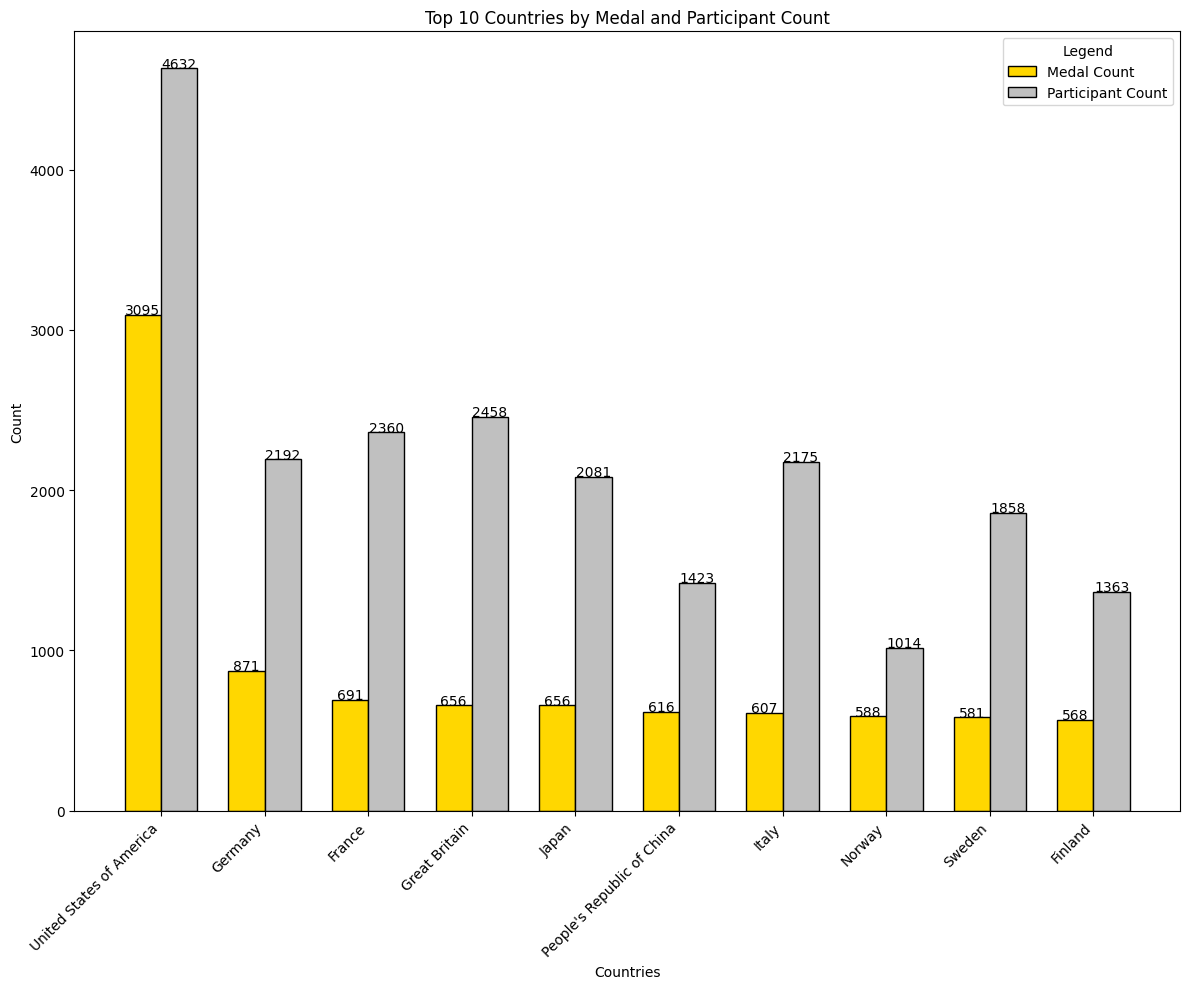

In [133]:
# Calculate the number of medals and participants for each country
medal_count = merged_data.groupby('country_name')['medal_type_x'].count().reset_index(name='medal_count')
participant_count = merged_data.groupby('country_name')['athlete_full_name'].nunique().reset_index(name='participant_count')

# Merge medal count and participant count
country_data = pd.merge(medal_count, participant_count, on='country_name')

# Sort by medal count and select top 10 countries
top_countries = country_data.sort_values(by='medal_count', ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.35
index = range(len(top_countries))

# Plot bars for medal counts and participant counts
bars1 = ax.bar([i - bar_width/2 for i in index], top_countries['medal_count'], bar_width, color='gold', label='Medal Count', edgecolor='black')
bars2 = ax.bar([i + bar_width/2 for i in index], top_countries['participant_count'], bar_width, color='silver', label='Participant Count', edgecolor='black')

# Add titles and labels
ax.set_title('Top 10 Countries by Medal and Participant Count')
ax.set_xlabel('Countries')
ax.set_ylabel('Count')
ax.set_xticks(index)
ax.set_xticklabels(top_countries['country_name'], rotation=45, ha='right')
ax.legend(title='Legend')

# Display numbers on the bars
for i in index:
    ax.text(i - bar_width/2, top_countries['medal_count'].iloc[i] + 5, f'{top_countries["medal_count"].iloc[i]}', ha='center', color='black')
    ax.text(i + bar_width/2, top_countries['participant_count'].iloc[i] + 5, f'{top_countries["participant_count"].iloc[i]}', ha='center', color='black')

plt.tight_layout()
plt.show()


In [134]:
# Function to group sports and combine into "Other Sports" if the count exceeds 15
def group_sports_by_medals(data):
    # Group by discipline and count medals
    sport_medals = data.groupby('discipline_title_x')['medal_type_x'].count().reset_index()
    
    # Sort by medal count in ascending order
    sport_medals = sport_medals.sort_values(by='medal_type_x', ascending=True)

    # If there are more than 15 sports, combine into "Other Sports"
    if len(sport_medals) > 15:
        top_15_sports = sport_medals.tail(15)  # Keep the top 15
        other_sports_count = sport_medals.head(len(sport_medals) - 15)['medal_type_x'].sum()
        other_row = pd.DataFrame({'discipline_title_x': ['Other Sports'], 'medal_type_x': [other_sports_count]})
        sport_medals = pd.concat([top_15_sports, other_row])
    
    return sport_medals.sort_values(by='medal_type_x', ascending=True)  # Sort the final result again

# Filter Summer and Winter Olympics data
summer_olympics = merged_data[merged_data['game_season'] == 'Summer']
winter_olympics = merged_data[merged_data['game_season'] == 'Winter']

# Get the grouped sports data for both Summer and Winter
summer_sports_medals = group_sports_by_medals(summer_olympics)
winter_sports_medals = group_sports_by_medals(winter_olympics)

# Print the medal distribution for Summer Olympics
print("Medal Distribution by Sports (Summer Olympics):")
print(summer_sports_medals.to_string(index=False))

# Print the medal distribution for Winter Olympics
print("\nMedal Distribution by Sports (Winter Olympics):")
print(winter_sports_medals.to_string(index=False))


Medal Distribution by Sports (Summer Olympics):
 discipline_title_x  medal_type_x
            Sailing           157
       Cycling Road           162
          Taekwondo           171
       Canoe Sprint           281
             Diving           346
            Fencing           371
      Cycling Track           441
               Judo           552
      Weightlifting           577
           Shooting           760
             Boxing           871
          Wrestling          1109
       Other Sports          1180
Gymnastics Artistic          1365
           Swimming          2225
          Athletics          2955

Medal Distribution by Sports (Winter Olympics):
       discipline_title_x  medal_type_x
                Bobsleigh             3
              Short Track            27
                 Skeleton            39
                     Luge            91
          Nordic Combined           109
           Figure skating           136
                Snowboard           160
     

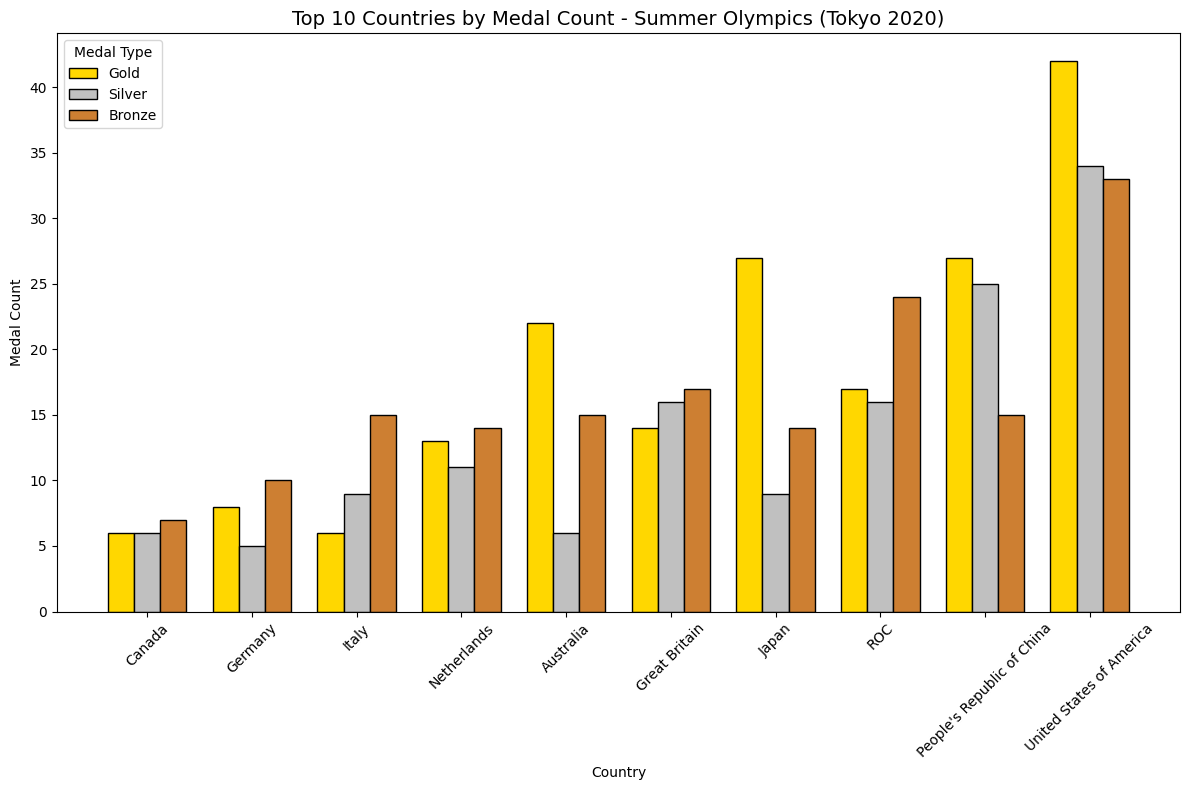

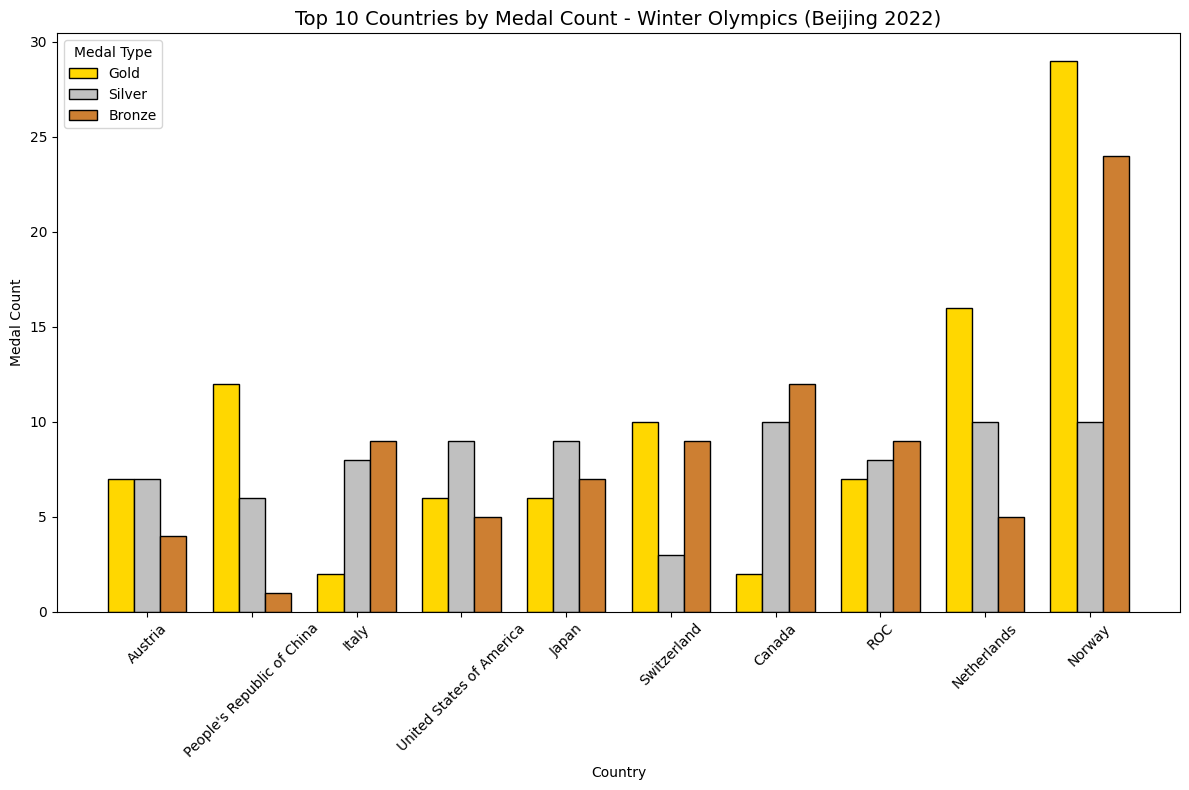

In [135]:
summer_olympics = merged_data[(merged_data['game_name'] == last_summer)]
winter_olympics = merged_data[(merged_data['game_name'] == last_winter)]

# Group by country and medal type for Summer and Winter Olympics
summer_medals = summer_olympics.groupby(['country_name', 'medal_type_x'])['medal_type_x'].count().unstack().fillna(0).reset_index()
winter_medals = winter_olympics.groupby(['country_name', 'medal_type_x'])['medal_type_x'].count().unstack().fillna(0).reset_index()

# Sum total medals and sort by total count for top 10 countries
summer_medals['Total'] = summer_medals[['GOLD', 'SILVER', 'BRONZE']].sum(axis=1)
winter_medals['Total'] = winter_medals[['GOLD', 'SILVER', 'BRONZE']].sum(axis=1)

top_10_summer = summer_medals.sort_values(by='Total', ascending=True).tail(10)
top_10_winter = winter_medals.sort_values(by='Total', ascending=True).tail(10)

# Create bar graph for Summer Olympics
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = np.arange(len(top_10_summer))

ax1.bar(index, top_10_summer['GOLD'], bar_width, color='gold', label='Gold', edgecolor='black')
ax1.bar(index + bar_width, top_10_summer['SILVER'], bar_width, color='silver', label='Silver', edgecolor='black')
ax1.bar(index + 2 * bar_width, top_10_summer['BRONZE'], bar_width, color='#cd7f32', label='Bronze', edgecolor='black')

ax1.set_title(f'Top 10 Countries by Medal Count - Summer Olympics ({last_summer})', fontsize=14)
ax1.set_xlabel('Country')
ax1.set_ylabel('Medal Count')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(top_10_summer['country_name'], rotation=45)
ax1.legend(title='Medal Type')

plt.tight_layout()

# Create bar graph for Winter Olympics
fig, ax2 = plt.subplots(figsize=(12, 8))

index = np.arange(len(top_10_winter))

ax2.bar(index, top_10_winter['GOLD'], bar_width, color='gold', label='Gold', edgecolor='black')
ax2.bar(index + bar_width, top_10_winter['SILVER'], bar_width, color='silver', label='Silver', edgecolor='black')
ax2.bar(index + 2 * bar_width, top_10_winter['BRONZE'], bar_width, color='#cd7f32', label='Bronze', edgecolor='black')

ax2.set_title(f'Top 10 Countries by Medal Count - Winter Olympics ({last_winter})', fontsize=14)
ax2.set_xlabel('Country')
ax2.set_ylabel('Medal Count')
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(top_10_winter['country_name'], rotation=45)
ax2.legend(title='Medal Type')

plt.tight_layout()
plt.show()


Insights Between Summer and Winter Olympics Medal Distribution by Sports:

- Total Medal Distribution Across Both Olympics:
    - The Summer Olympics shows a higher overall medal distribution across sports compared to the Winter Olympics.
    
    - The most prominent sports in the Summer Olympics "Athletics" have a significantly higher medal count 2,955 than those in the Winter Olympics. While the top sport in the Winter Olympics, Speed Skating has 890 medals only.

- Top Sports with Most Medals:
    - Summer Olympics: Athletics (2,955 medals) and Swimming (2,225 medals) are the two largest contributors to the medal tally, indicating these are cornerstone events for Summer Games.
    Other Sports as a category (1,180 medals) represents a significant portion, highlighting a broader range of sports that do not individually reach the top 15 in terms of medal distribution.

    - Winter Olympics: Speed Skating (890 medals) and Alpine Skiing (730 medals) lead the Winter Games, with far fewer medals than top sports in the Summer Games.
    Biathlon and Cross Country Skiing also hold significant importance with 299 and 507 medals, respectively, reflecting their strong influence on the Winter Olympics medal distribution.

- Medal Distribution Range:

    - Summer Olympics: The range of medals is from 157 medals (Sailing) to 2,955 medals (Athletics), indicating a more even spread of medals across a wide variety of sports.
    Sports like Boxing (871 medals), Wrestling (1,109 medals), and Gymnastics Artistic (1,365 medals) further highlight the diversity in the Summer Games.

    - Winter Olympics: The range is more compressed, from 3 medals (Bobsleigh) to 890 medals (Speed Skating), indicating fewer disciplines with high medal counts.
    Sports like Bobsleigh (3 medals) and Skeleton (39 medals) have very few medals awarded, reflecting the smaller number of participants and competitions in these events compared to those in the Summer Olympics.

- Medal Distribution in "Other Sports":

    - In the Summer Olympics, Other Sports has a substantial contribution of 1,180 medals, underscoring the vast number of sports that make up a smaller proportion of the overall event.
    
    - In the Winter Olympics, the sports are more concentrated with fewer disciplines, so the top sports account for most medals, and no "Other Sports" category is needed due to the smaller variety.

- Key Sports Differences in the Two Olympics:

    - The Summer Olympics involves a broader variety of sports with larger participant pools and more events, leading to a higher total medal count.
    
    - The Winter Olympics is more focused on a few major sports, particularly skiing and skating disciplines, which dominate the event.

- Key insights and indicators:

    - Winter Olympics sports are heavily focused on disciplines that involve ice and snow, such as Speed Skating and Alpine Skiing, which together account for nearly 50% of the top sports' medal counts.

    - The broader variety of sports in the Summer Olympics leads to a more even distribution of medals across events, whereas the Winter Olympics sees more concentration in fewer sports.
    "Other Sports" in the Summer Olympics contributes significantly, showing the vast diversity of competitions. In contrast, Winter Olympics doesn't have enough additional sports to necessitate this category, reflecting the more focused nature of the event.

    - Medal competitiveness is much higher in the Summer Olympics, as the top sports have significantly higher medal counts, showcasing the wider appeal and participation levels in these events.